In [152]:
import pandas as pd
datos = pd.read_csv('U4_01_housing.csv')


In [153]:
datos.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [154]:
datos.value_counts('ocean_proximity')

# 1, 2, 3, 4, 5

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
dtype: int64

In [155]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

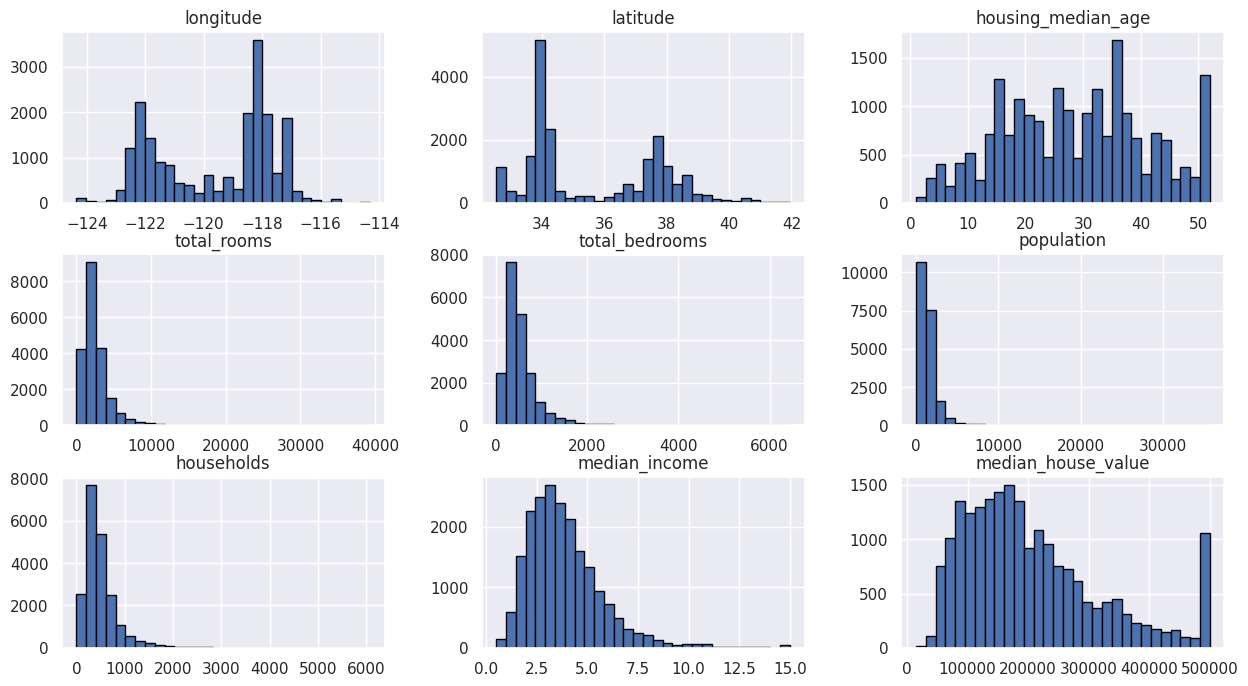

In [156]:
# figsize: dimensiones de las figuras
# bins: cambiar el # de columnas en el histograma
# edgecolor: aplica un color al borde

datos.hist( figsize=(15,8), bins=30, edgecolor = 'black' ) # represanta la informacion en histogramas

In [157]:
datos_na = datos.dropna() # eliminar los registros nulos

In [158]:
datos_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


<Axes: xlabel='latitude', ylabel='longitude'>

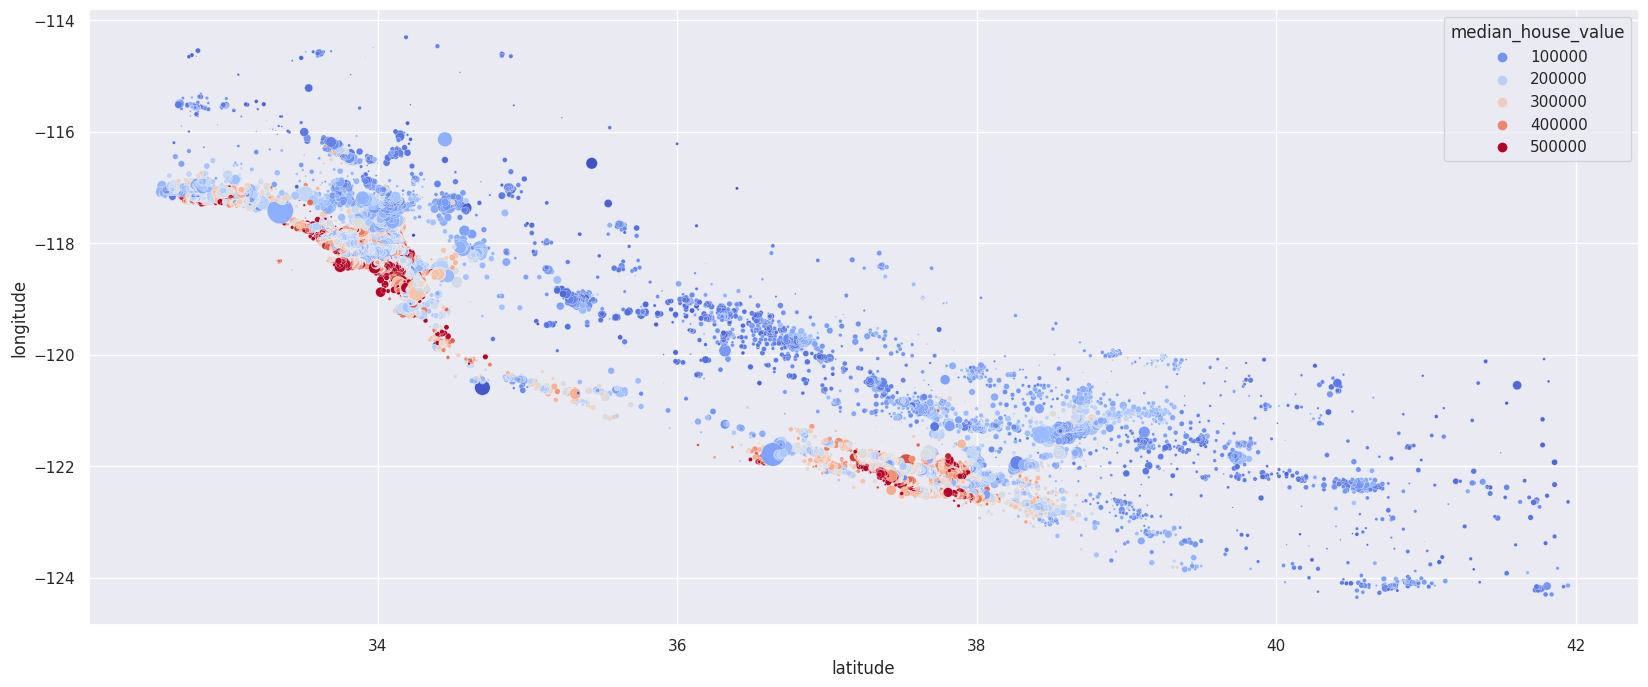

In [159]:
# graficar los datos
import seaborn as sb

sb.scatterplot(x='latitude', y='longitude', data=datos_na, hue='median_house_value', s=datos_na['population']/100, palette='coolwarm')

<Axes: xlabel='latitude', ylabel='longitude'>

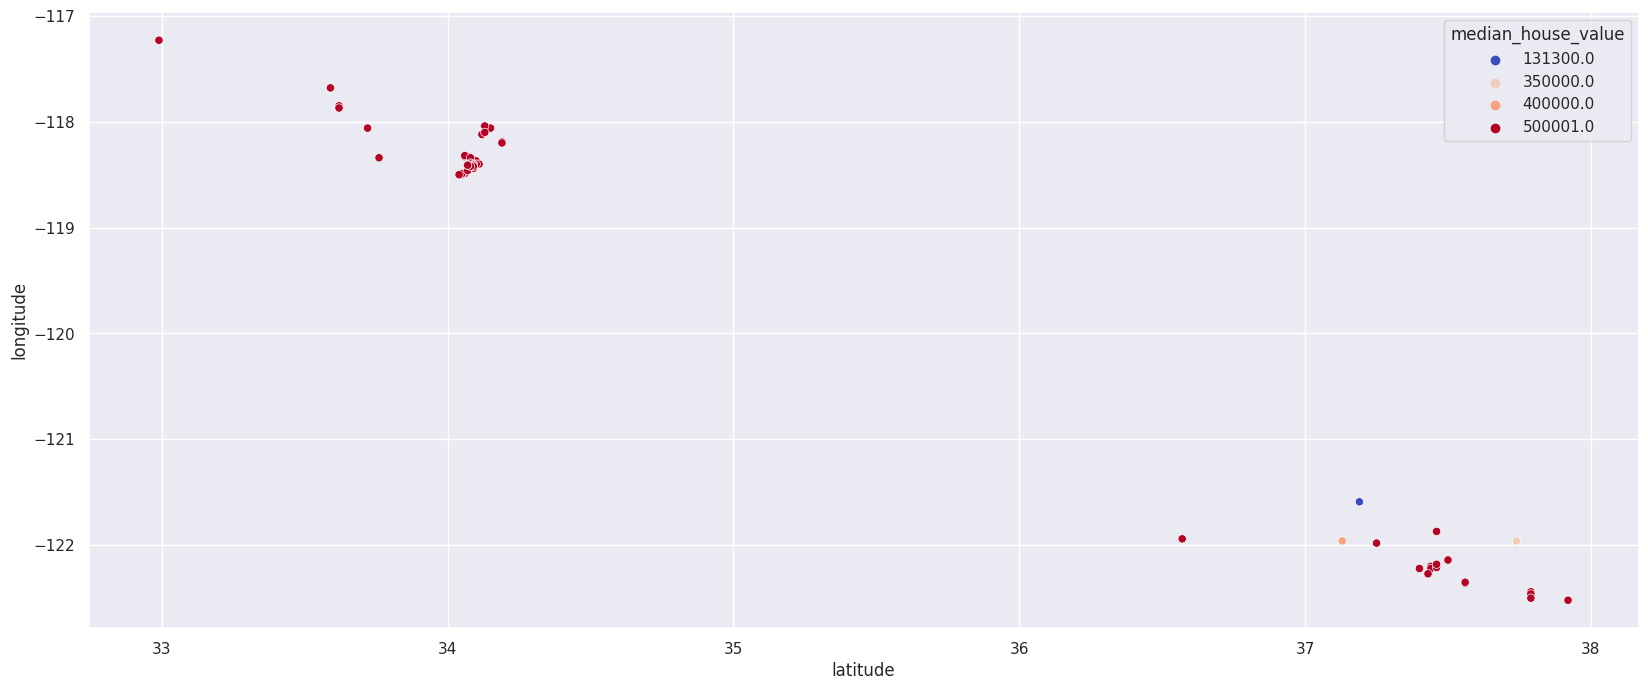

In [160]:
sb.scatterplot(x='latitude', y='longitude', data=datos_na[datos_na.median_income > 14], hue='median_house_value', palette='coolwarm')

In [161]:
# Dummies

# 1, 2, 3, 4, 5
#   NEAR BAY    INLAND    ISLAND
#       1         0          0
#       0         0          1

dummies = pd.get_dummies(datos_na['ocean_proximity'], dtype=int)


In [162]:
#union de los dummies al dataframe
datos_na = datos_na.join(dummies)

In [163]:
#eliminar la columna que no necesito
datos_na = datos_na.drop(['ocean_proximity'], axis=1)

In [164]:
datos_na.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.109357  0.011899            1.000000    -0.360628   
total_rooms          0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.100270 -0.108997           -0.295787     0.857281   
households           0.056513 -0.071774           -0.302768     0.918992   
median_income       -0.015550 -0.079626           -0.118278     0.197882   
median_house_value  -0.045398 -0.144638            0.106432     0.133294   
<1H OCEAN            0.320831 -0.446928            0.045553    -0.003777   
INLAND              -0.055337  0.351084           -0.236968     0.026477   
ISLAND               0.009501 -0.016662            0.017105    -0.007603   
NEAR BAY            -0.474714  0.358785            0.256149    -0.023647   
NEAR OCEAN           0.046185 -0.161342            0.020797    -0.008674   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.100270    0.056513      -0.015550   
latitude                 -0.066983   -0.108997   -0.071774      -0.079626   
housing_median_age       -0.320451   -0.295787   -0.302768      -0.118278   
total_rooms               0.930380    0.857281    0.918992       0.197882   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907186       0.005087   
households                0.979728    0.907186    1.000000       0.013434   
median_income            -0.007723    0.005087    0.013434       1.000000   
median_house_value        0.049686   -0.025300    0.064894       0.688355   
<1H OCEAN                 0.018314    0.073450    0.041883       0.168715   
INLAND                   -0.006463   -0.019602   -0.038265      -0.237536   
ISLAND                   -0.004361   -0.010451   -0.009119      -0.009281   
NEAR BAY                 -0.019873   -0.061480   -0.011280       0.056677   
NEAR OCEAN                0.000679   -0.023498    0.002106       0.027351   

                    median_house_value  <1H OCEAN    INLAND    ISLAND  \
longitude                    -0.045398   0.320831 -0.055337  0.009501   
latitude                     -0.144638  -0.446928  0.351084 -0.016662   
housing_median_age            0.106432   0.045553 -0.236968  0.017105   
total_rooms                   0.133294  -0.003777  0.026477 -0.007603   
total_bedrooms                0.049686   0.018314 -0.006463 -0.004361   
population                   -0.025300   0.073450 -0.019602 -0.010451   
households                    0.064894   0.041883 -0.038265 -0.009119   
median_income                 0.688355   0.168715 -0.237536 -0.009281   
median_house_value            1.000000   0.257614 -0.484787  0.023525   
<1H OCEAN                     0.257614   1.000000 -0.607778 -0.013928   
INLAND                       -0.484787  -0.607778  1.000000 -0.010681   
ISLAND                        0.023525  -0.013928 -0.010681  1.000000   
NEAR BAY                      0.160526  -0.314721 -0.241356 -0.005531   
NEAR OCEAN                    0.140378  -0.342018 -0.262289 -0.006011   

                    NEAR BAY  NEAR OCEAN  
longitude          -0.474714    0.046185  
latitude            0.358785   -0.161342  
housing_median_age  0.256149    0.020797  
total_rooms        -0.023647   -0.008674  
total_bedrooms     -0.019873    0.000679  
population         -0.061480   -0.023498  
households         -0.011280    0.002106  
median_income       0.056677    0.027351  
median_house_value  0.160526    0.140378  
<1H OCEAN          -0.314721   -0.342018  
INLAND             -0.241356   -0.262289  
ISLAND             -0.005531   -0.006011  
NEAR BAY            1.000000   -0.135819  
NEAR OCEAN         -0.135

<Axes: >

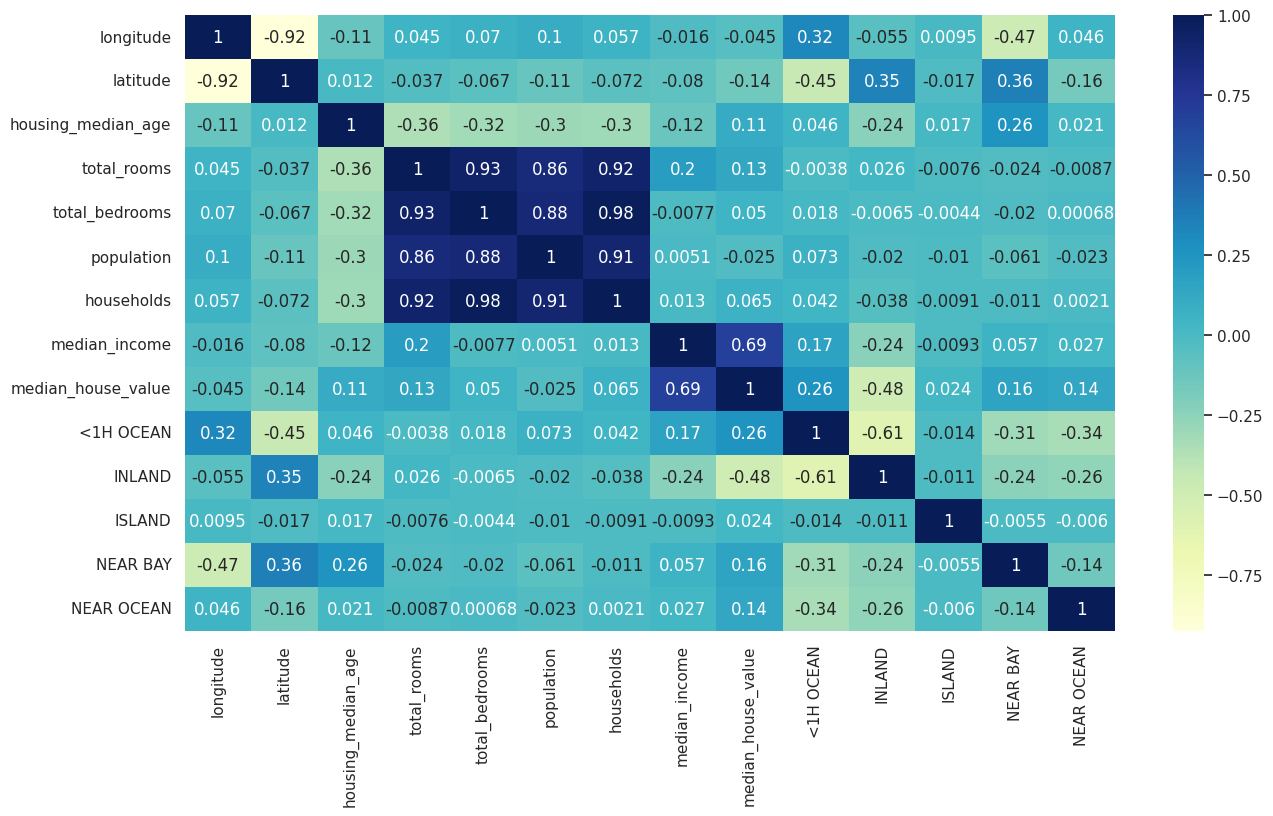

In [165]:
#diagrama de correlaciones

sb.set(rc={'figure.figsize':(15,8)})
sb.heatmap(data=datos_na.corr(), annot=True, cmap='YlGnBu' )

In [166]:
#valores correlacionados del median_house_value

datos.corr()['median_house_value'].sort_values(ascending=False)

<ipython-input-166-4a987637d184>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datos.corr()['median_house_value'].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<Axes: xlabel='median_house_value', ylabel='median_income'>

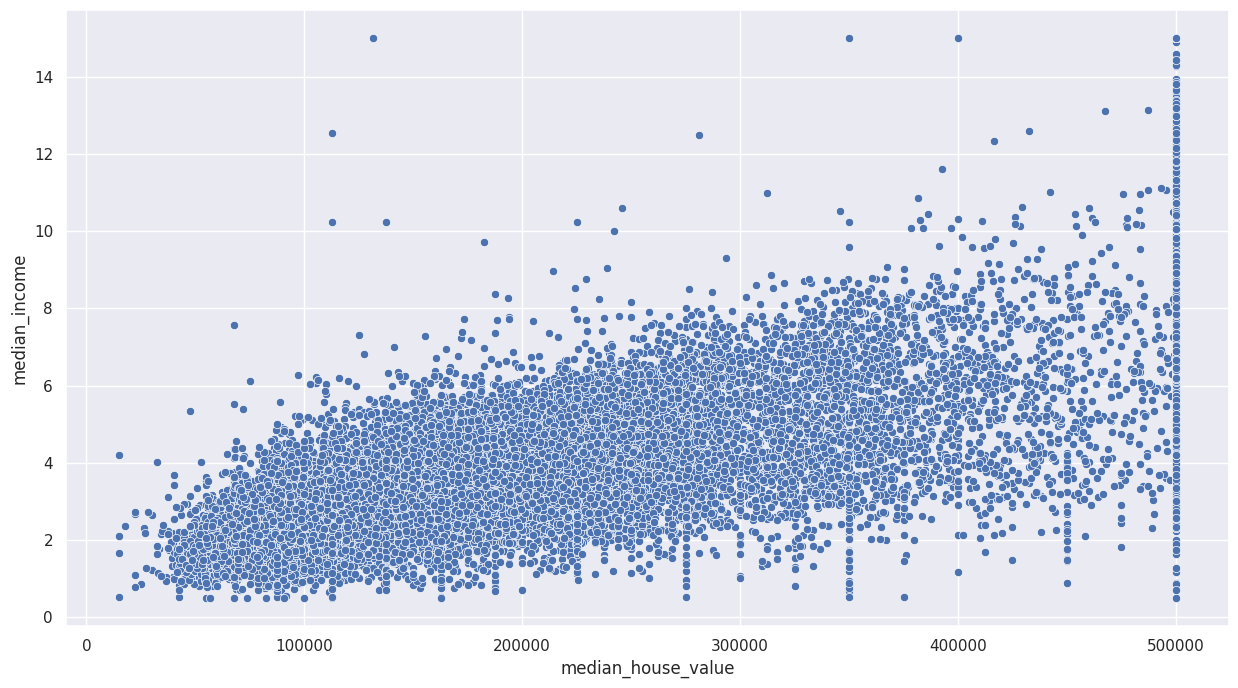

In [167]:
# grafica de relacion entre el valor de la casa y los ingresos

sb.scatterplot(x=datos_na['median_house_value'], y=datos_na['median_income'])



In [168]:
datos_na.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.109357  0.011899            1.000000    -0.360628   
total_rooms          0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.100270 -0.108997           -0.295787     0.857281   
households           0.056513 -0.071774           -0.302768     0.918992   
median_income       -0.015550 -0.079626           -0.118278     0.197882   
median_house_value  -0.045398 -0.144638            0.106432     0.133294   
<1H OCEAN            0.320831 -0.446928            0.045553    -0.003777   
INLAND              -0.055337  0.351084           -0.236968     0.026477   
ISLAND               0.009501 -0.016662            0.017105    -0.007603   
NEAR BAY            -0.474714  0.358785            0.256149    -0.023647   
NEAR OCEAN           0.046185 -0.161342            0.020797    -0.008674   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.100270    0.056513      -0.015550   
latitude                 -0.066983   -0.108997   -0.071774      -0.079626   
housing_median_age       -0.320451   -0.295787   -0.302768      -0.118278   
total_rooms               0.930380    0.857281    0.918992       0.197882   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907186       0.005087   
households                0.979728    0.907186    1.000000       0.013434   
median_income            -0.007723    0.005087    0.013434       1.000000   
median_house_value        0.049686   -0.025300    0.064894       0.688355   
<1H OCEAN                 0.018314    0.073450    0.041883       0.168715   
INLAND                   -0.006463   -0.019602   -0.038265      -0.237536   
ISLAND                   -0.004361   -0.010451   -0.009119      -0.009281   
NEAR BAY                 -0.019873   -0.061480   -0.011280       0.056677   
NEAR OCEAN                0.000679   -0.023498    0.002106       0.027351   

                    median_house_value  <1H OCEAN    INLAND    ISLAND  \
longitude                    -0.045398   0.320831 -0.055337  0.009501   
latitude                     -0.144638  -0.446928  0.351084 -0.016662   
housing_median_age            0.106432   0.045553 -0.236968  0.017105   
total_rooms                   0.133294  -0.003777  0.026477 -0.007603   
total_bedrooms                0.049686   0.018314 -0.006463 -0.004361   
population                   -0.025300   0.073450 -0.019602 -0.010451   
households                    0.064894   0.041883 -0.038265 -0.009119   
median_income                 0.688355   0.168715 -0.237536 -0.009281   
median_house_value            1.000000   0.257614 -0.484787  0.023525   
<1H OCEAN                     0.257614   1.000000 -0.607778 -0.013928   
INLAND                       -0.484787  -0.607778  1.000000 -0.010681   
ISLAND                        0.023525  -0.013928 -0.010681  1.000000   
NEAR BAY                      0.160526  -0.314721 -0.241356 -0.005531   
NEAR OCEAN                    0.140378  -0.342018 -0.262289 -0.006011   

                    NEAR BAY  NEAR OCEAN  
longitude          -0.474714    0.046185  
latitude            0.358785   -0.161342  
housing_median_age  0.256149    0.020797  
total_rooms        -0.023647   -0.008674  
total_bedrooms     -0.019873    0.000679  
population         -0.061480   -0.023498  
households         -0.011280    0.002106  
median_income       0.056677    0.027351  
median_house_value  0.160526    0.140378  
<1H OCEAN          -0.314721   -0.342018  
INLAND             -0.241356   -0.262289  
ISLAND             -0.005531   -0.006011  
NEAR BAY            1.000000   -0.135819  
NEAR OCEAN         -0.135

In [169]:
#agregar caracteristica de ratio de habitaciones de dormir

datos_na['room_ratio'] = datos_na['total_bedrooms'] /  datos_na['total_rooms']



############################################################ cambios empiezan agregados aqui#########################################################################
############################################################ cambios empiezan agregados aqui#########################################################################
#caracteristicas nuevas creadas para poder mejorer el score

#datos_na['people_per_house'] =  datos_na['population'] / datos_na['households']
# datos_na['houses_per_person'] =  datos_na['households'] / datos_na['population']
datos_na['avg_rooms_per_household'] =   datos_na['total_rooms']/datos_na['households']
datos_na['bedrooms_per_person'] =   datos_na['total_bedrooms']/datos_na['population']
datos_na['rooms_per_person'] =   datos_na['total_rooms']/datos_na['population']
datos_na['median_room_value'] =  datos_na['median_house_value'] / datos_na['avg_rooms_per_household']  #ESTA RESULTO SER LA CARACTERISTICA CLAVE!


############################################################ cambios agregados terminan aqui#########################################################################

<Axes: >

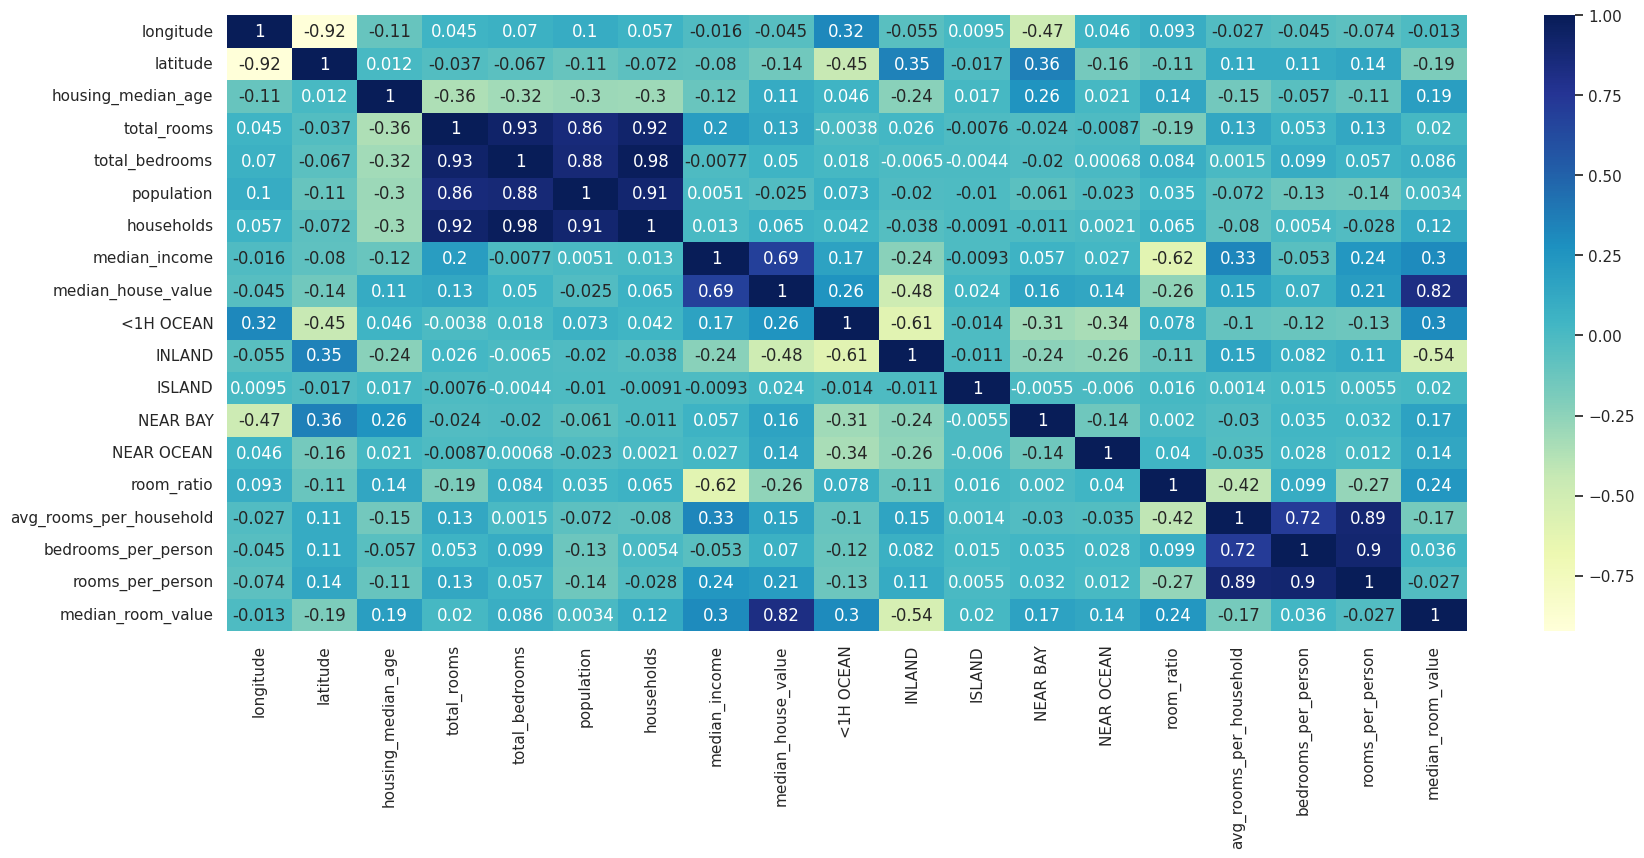

In [170]:

sb.set(rc={'figure.figsize':(20,8)})
sb.heatmap(data=datos_na.corr(), annot=True, cmap='YlGnBu' )

In [171]:
#analisis de los registros que tienen valores tope asignados

In [172]:
# separar las caracteristicas

#caracteristicas de entrada???
X = datos_na.drop(['median_house_value'], axis=1) #eliminar una columna

#la etiqueta de salida o resultado
y = datos_na['median_house_value']

In [173]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=.2)

In [174]:
from sklearn.tree import DecisionTreeRegressor

# modelo = DecisionTreeClassifier(max_depth = None) # un nivel de profundiad

modelo =DecisionTreeRegressor(random_state=6546)
modelo.fit(X_train,y_train)

predicciones = modelo.predict(X_test)

In [180]:
# porcentaje de precision obtenido

from sklearn.model_selection import cross_val_score

cross_val_score(modelo, X_test, y_test, cv=15)

#un promedio de 0.978342618

array([0.96840761, 0.9853171 , 0.95558142, 0.97372894, 0.98505675,
       0.98063143, 0.98887104, 0.97094748, 0.97750824, 0.98239058,
       0.98290893, 0.97877391, 0.97491462, 0.98912025, 0.98258061])

In [177]:
#mean squared error
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error( y_test, predicciones )

mse = np.sqrt(mse)

mse


8241.113155416077

In [178]:

#comparando precios
comparativa = { 'predicciones': predicciones, 'Valor original': y_test }

pd.DataFrame(comparativa)

predicciones  Valor original
1367       178500.0        178300.0
13103      239900.0        240900.0
14612      140200.0        140400.0
10356      265700.0        266000.0
17611      431600.0        426900.0
...             ...             ...
10635      319500.0        313400.0
7931       208600.0        210900.0
20301      162500.0        160800.0
4145       175000.0        172100.0
19868       93400.0         93700.0

[4087 rows x 2 columns]

[Text(0.5093610022396416, 0.9545454545454546, 'median_room_value <= 44912.986\nsquared_error = 13290805636.946\nsamples = 16346\nvalue = 206545.556'),
 Text(0.2573444498880179, 0.8636363636363636, 'median_room_value <= 27847.114\nsquared_error = 3905111673.43\nsamples = 10972\nvalue = 148004.803'),
 Text(0.12527120660694288, 0.7727272727272727, 'median_room_value <= 18856.676\nsquared_error = 1314457264.496\nsamples = 5498\nvalue = 103569.006'),
 Text(0.06507208846584546, 0.6818181818181818, 'avg_rooms_per_household <= 9.34\nsquared_error = 929485468.902\nsamples = 2719\nvalue = 81494.96'),
 Text(0.03583426651735722, 0.5909090909090909, 'median_room_value <= 13941.058\nsquared_error = 395556534.091\nsamples = 2549\nvalue = 77252.843'),
 Text(0.01791713325867861, 0.5, 'avg_rooms_per_household <= 5.234\nsquared_error = 198596037.124\nsamples = 1083\nvalue = 62947.458'),
 Text(0.008958566629339306, 0.4090909090909091, 'median_room_value <= 11233.518\nsquared_error = 73258327.595\nsamples 

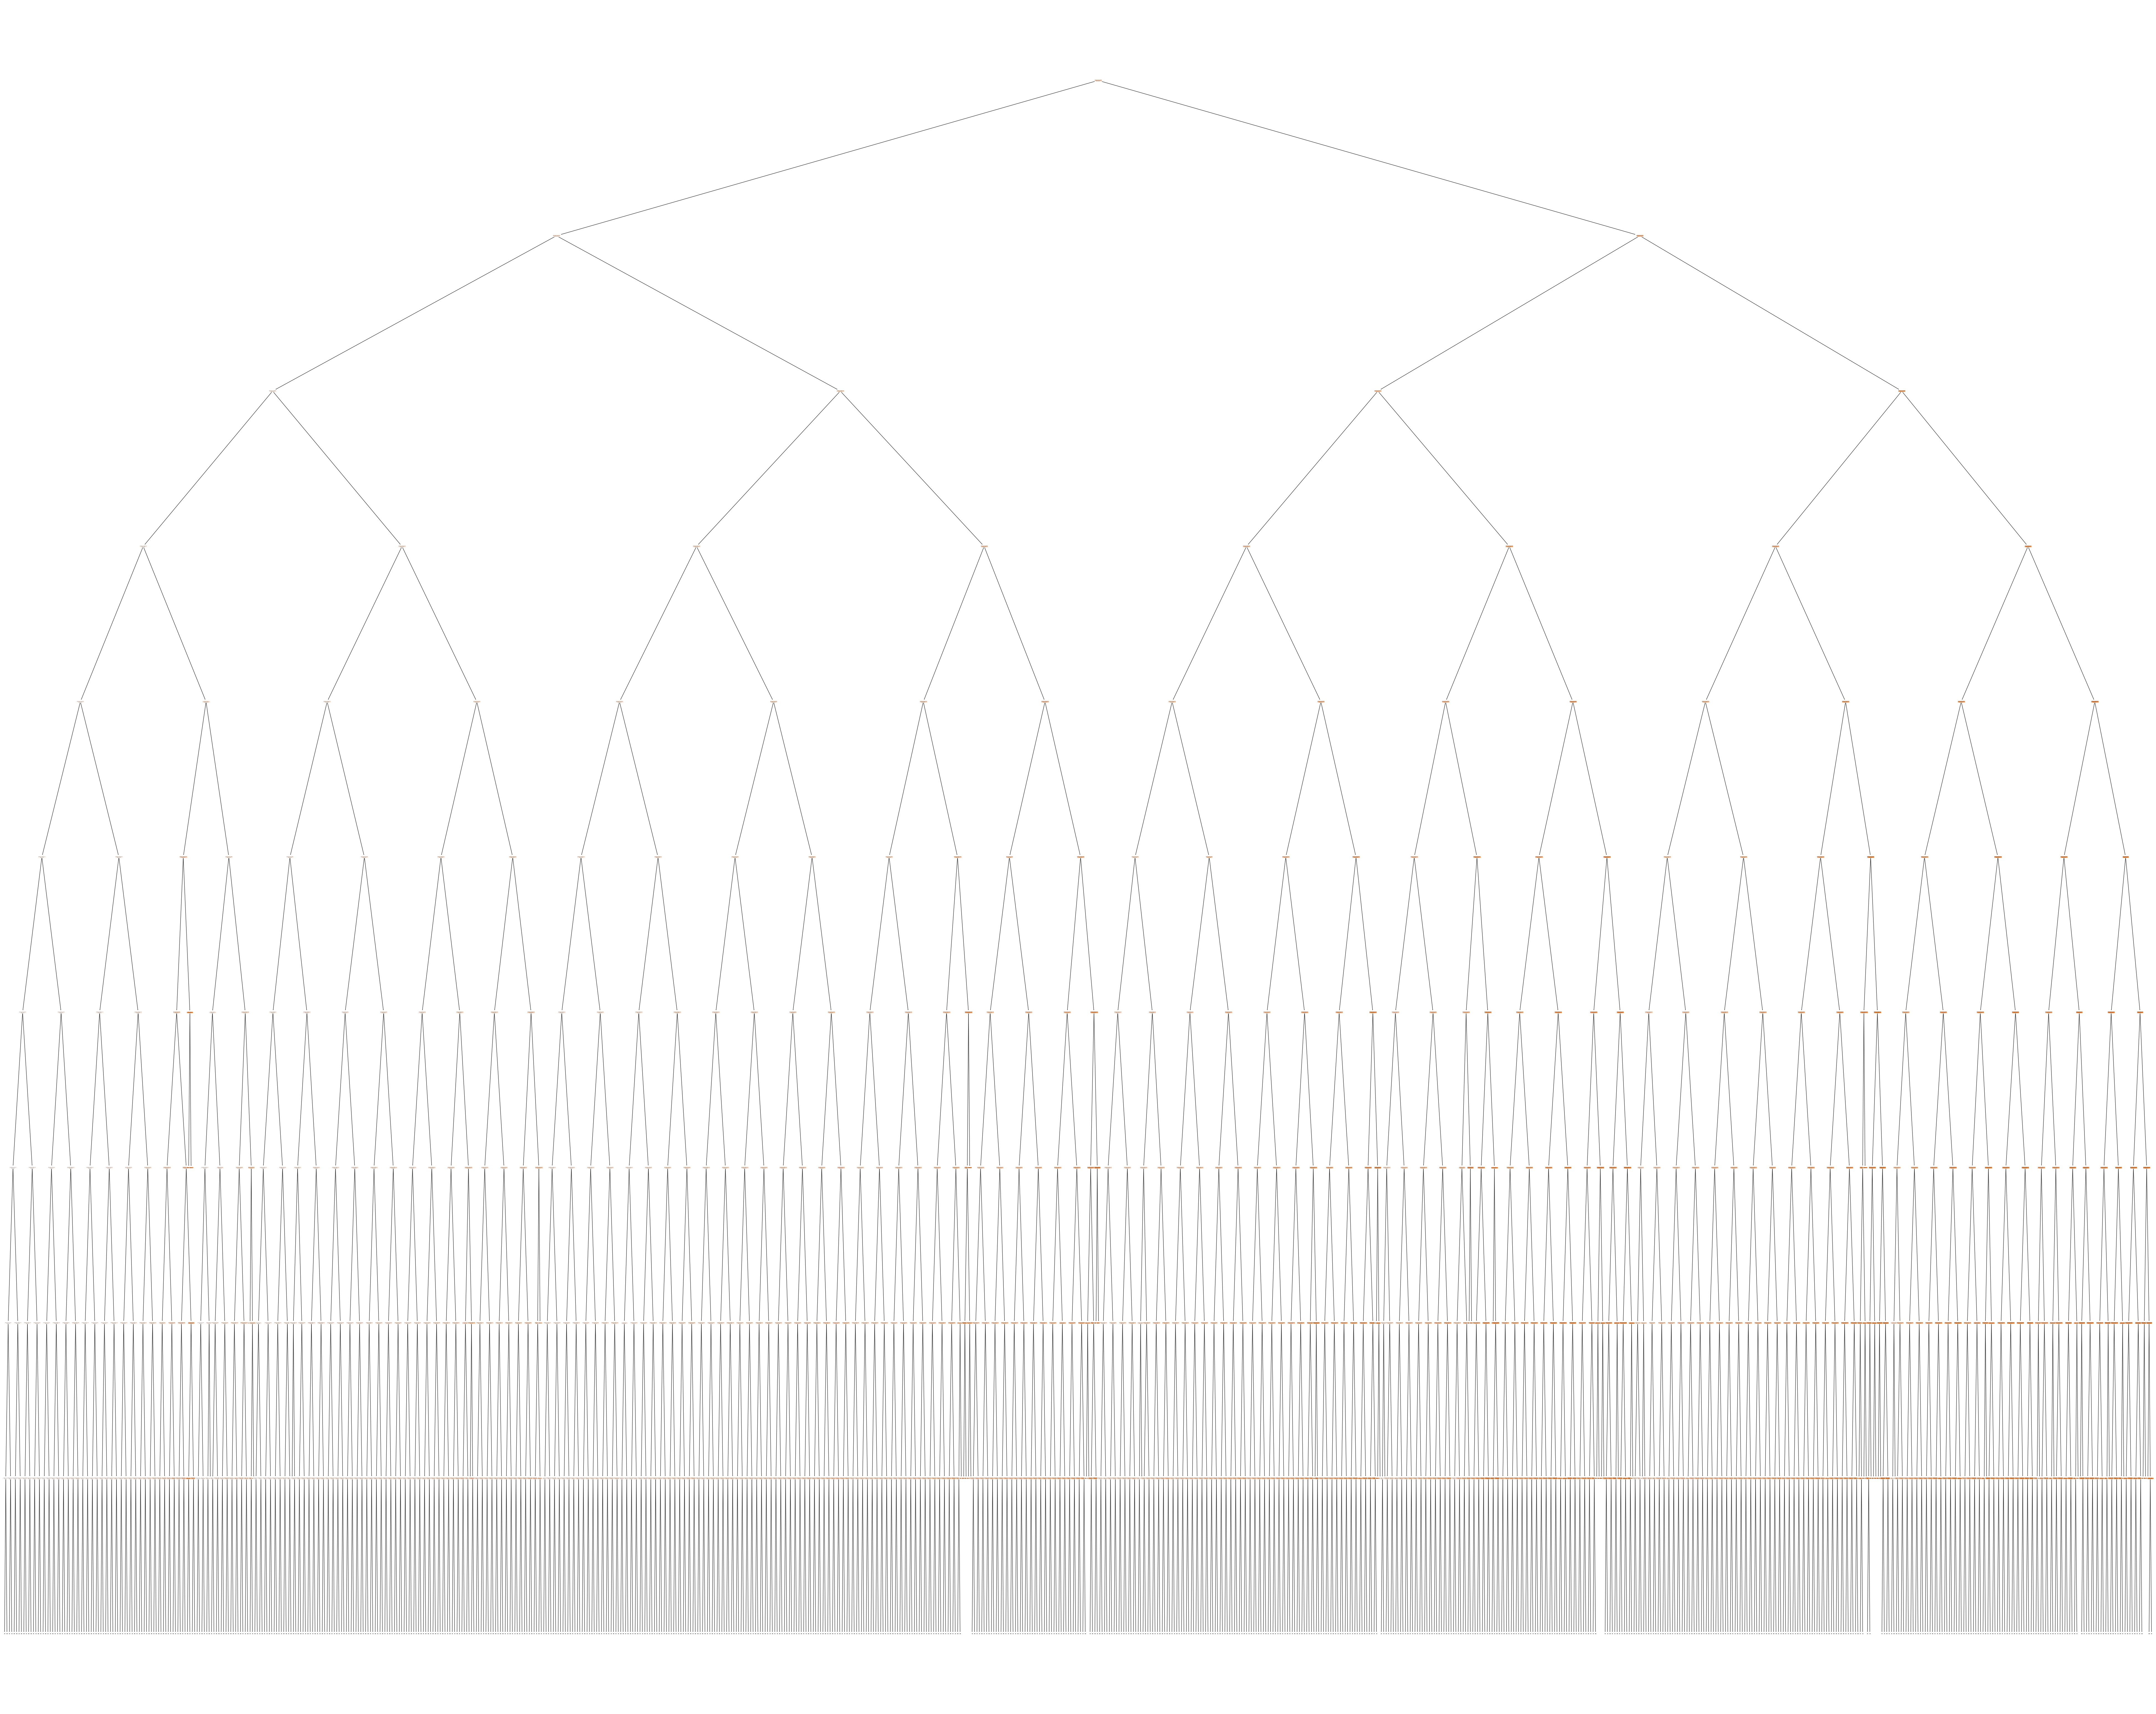

In [176]:
#graficar el modelo para ver la relacion entre las caracteristicas
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100,80))
plot_tree(
    modelo,
    feature_names = X_train.columns,
    max_depth=9,
    filled=True
)
